In [1]:
import open3d as o3d
import numpy as np
import SimpleITK as sitk
from skimage import measure
import matplotlib.pyplot as plt
import nibabel as nib

def npy_to_voxel_grid(npy_file, voxel_size=1.0):
    # Load the .npy file
    volume = np.load(npy_file)
    
    # Create a PointCloud from the non-zero voxels
    points = np.argwhere(volume > 0)  # Get the indices of non-zero elements
    point_cloud = o3d.geometry.PointCloud()
    point_cloud.points = o3d.utility.Vector3dVector(points)

    # Assign colors (uniform color in this case)
    colors = np.tile([1, 0, 0], (len(points), 1))  # Repeat the color for each point
    point_cloud.colors = o3d.utility.Vector3dVector(colors)

    # Use create_from_point_cloud_within_bounds to generate a VoxelGrid
    voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud_within_bounds(
        point_cloud,
        voxel_size=voxel_size,
        min_bound=[0, 0, 0],
        max_bound=np.array(volume.shape) * voxel_size
    )
    
    return voxel_grid

def visualize(voxel_grid):
    # Visualize the VoxelGrid
    o3d.visualization.draw_geometries([voxel_grid])


# Function to convert NIfTI to NumPy
def save_nifti_as_numpy(nifti_path, output_path):
    img = nib.load(nifti_path)
    data = img.get_fdata()
    np.save(output_path, data)
    print(f"Saved {nifti_path} as a NumPy array to {output_path}")

# Usage example:
nii_file = 'AeroPath/1/1_CT_HR_label_airways.nii.gz'
npy_file = '1_CT_HR_label_airways.npy'

# Save and convert NIfTI to NumPy
save_nifti_as_numpy(nii_file, npy_file)

# Load NumPy array as a voxel grid and visualize
voxel_grid = npy_to_voxel_grid(npy_file, voxel_size=1.0)
visualize(voxel_grid)



Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Saved AeroPath/1/1_CT_HR_label_airways.nii.gz as a NumPy array to 1_CT_HR_label_airways.npy


Saved AeroPath/1/1_CT_HR_label_airways.nii.gz as a NumPy array to 1_CT_HR_label_airways.npy


In [2]:
volume = np.load(npy_file + '.npy')
volume

FileNotFoundError: [Errno 2] No such file or directory: '1_CT_HR_label_airways.npy.npy'

In [34]:
volume = np.load(npy_file)
print("Data max value:", np.max(volume))
print("Data min value:", np.min(volume))

Data max value: 1424
Data min value: 0


0
1
0.0023279109058218115


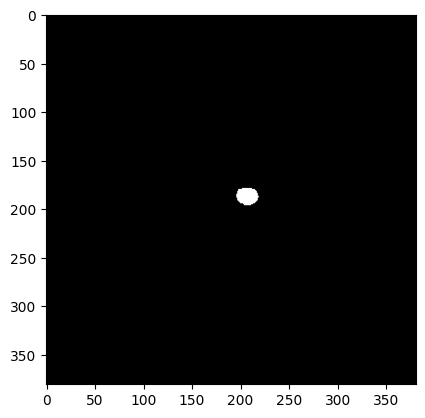

In [59]:
npy_file = "/home/gasyna/RiSA_S3/3D_segmentation/3D_data_loader/dataset/airways/2_CT_HR_0_0_5.npy"
file = np.load(npy_file)


print(file.min())
print(file.max())
print(file.mean())

fig, ax = plt.subplots()
im = ax.imshow(file[..., 30], cmap="gray")

plt.show()

In [60]:

file[..., 30]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [ ]:
file